데이터 탐색
==

다루는 내용
--
- 데이터 특성 보기, 데이터 탐색, 시각화
- 클러스터링

데이터
--
- 전력판매량(시도별/용도별) 액셀 파일 https://goo.gl/Cx8Rzw
- 위 자료는 전력거래소에서 받은 자료임
- 이 파일을 현재 작업중인 (쥬피터 노트북이 실행되는) 폴더 아래에 data 폴더를 만들고 data 폴더로 복사한다

필요한 라이브러리(모듈) 설치
--

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

데이터 읽기
--

In [3]:
power_data = pd.read_excel('data/시도별_용도별.xls')
print(power_data.shape)

(19, 28)


In [4]:
power_data

,구분,주거용,공공용,서비스업,업무용합계,농림어업,광업,제조업,식료품제조,"섬유,의류",...,기타기계,사무기기,전기기기,"영상,음향",자동차,기타운송,가구및기타,재생재료,산업용합계,합계
0,강원,1940933,1400421,6203749,7604170,607139,398287,6002286,546621,13027,...,35063,2019,38062,43986,113448,108629,12872,3418,7007712,16552816
1,개성,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,경기,16587710,5533662,33434551,38968213,2371347,317263,56603327,2544420,2109963,...,3613798,317244,1040171,24519644,2977165,67594,1833112,133041,59291937,114847859
3,경남,4260988,1427560,8667737,10095297,2141813,95989,18053778,932743,346974,...,1902913,8070,924235,534196,2156059,2048646,262523,47662,20291580,34647864
4,경북,3302463,1578115,8487402,10065517,1747462,224568,30115601,566071,3780171,...,782570,14468,750786,4174971,2356890,123935,60280,77104,32087631,45455611
5,광주,1954876,565527,3174973,3740500,74608,2898,2910768,161072,295922,...,198847,5967,236622,723764,512148,5140,13392,16049,2988274,8683649
6,대구,3151904,826396,5470438,6296834,69142,5858,5862633,212626,1057342,...,516493,58446,180189,252662,1381273,68127,41814,33616,5937633,15386372
7,대전,1872890,954681,3955921,4910602,28643,3326,2608343,204171,41687,...,77970,2949,83609,474561,218191,5439,31657,2252,2640312,9423804
8,부산,4473510,1305876,7582169,8888045,107927,25289,7512588,532943,528513,...,904149,4913,107717,90644,1046529,231141,49733,13104,7645804,21007358
9,서울,13131172,3581534,27647345,31228879,15150,4064,1918893,227077,497699,...,163688,4395,11425,46225,20182,17656,132707,2875,1938107,46298158


In [45]:
type(power_data)

pandas.core.frame.DataFrame

In [46]:
power_data.columns

Index(['구분', '주거용', '공공용', '서비스업', '업무용합계', '농림어업', '광업', '제조업', '식료품제조',
       '섬유,의류', '목재,나무', '펄프,종이', '출판,인쇄', '석유,화확', '의료,광학', '요업', '1차금속',
       '조립금속', '기타기계', '사무기기', '전기기기', '영상,음향', '자동차', '기타운송', '가구및기타', '재생재료',
       '산업용합계', '합계'],
      dtype='object')

In [47]:
power = power_data.set_index('구분')

In [48]:
power = power.drop(['합계', '개성'], errors='ignore')

In [49]:
power.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, 강원 to 충북
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   주거용     17 non-null     int64
 1   공공용     17 non-null     int64
 2   서비스업    17 non-null     int64
 3   업무용합계   17 non-null     int64
 4   농림어업    17 non-null     int64
 5   광업      17 non-null     int64
 6   제조업     17 non-null     int64
 7   식료품제조   17 non-null     int64
 8   섬유,의류   17 non-null     int64
 9   목재,나무   17 non-null     int64
 10  펄프,종이   17 non-null     int64
 11  출판,인쇄   17 non-null     int64
 12  석유,화확   17 non-null     int64
 13  의료,광학   17 non-null     int64
 14  요업      17 non-null     int64
 15  1차금속    17 non-null     int64
 16  조립금속    17 non-null     int64
 17  기타기계    17 non-null     int64
 18  사무기기    17 non-null     int64
 19  전기기기    17 non-null     int64
 20  영상,음향   17 non-null     int64
 21  자동차     17 non-null     int64
 22  기타운송    17 non-null     int64
 23  가구및기타   17 non-null  

데이터 특성 보기
--
- boxplot
- barplot
- histogram

## 박스플롯
* 최댓값, 최솟값, 중앙값, 사분편차를 사용하여 자료의 측정값들이 어떤 모양으로 분포되어 있으며, 극단값들은 어떠한지 등을 쉽게 알 수 있도록 하는 그림

![img6](./img/img6.png)

![img7](./img/img7.png)

한글 폰트 설정 (맥, 윈도우, 리눅스)
--

In [36]:
#sudo apt-get install fonts-nanum* -qq

In [37]:
import platform
from matplotlib import font_manager, rc
plt.rc('font', family='DejaVu Sans')

In [38]:
# 체크해보면 폰트 개수가 늘어났다
sys_font=font_manager.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")

sys_font number: 313
nanum_font number: 31


In [41]:
# 운영 체제마다 한글이 보이게 하는 설정
# 윈도우
if platform.system() == 'Windows':
    path = "c:\Windows\Fonts\malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
# 맥
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
# 리눅스
elif platform.system() == 'Linux':
    
    rc('font', family='NanumGothic')

In [42]:
power.describe()

,서비스업,제조업
count,1.500000e+01,1.500000e+01
mean,5.324693e+06,1.336151e+07
std,2.309461e+06,1.126382e+07
min,6.454240e+05,2.415370e+05
25%,3.802654e+06,4.386700e+06
50%,5.470438e+06,1.236782e+07
75%,7.159428e+06,1.975385e+07
max,8.667737e+06,3.705796e+07


In [50]:
font_manager._rebuild() #font manager 다시 불러오기

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26]),
 [Text(1, 0, '주거용'),
  Text(2, 0, '공공용'),
  Text(3, 0, '서비스업'),
  Text(4, 0, '업무용합계'),
  Text(5, 0, '농림어업'),
  Text(6, 0, '광업'),
  Text(7, 0, '제조업'),
  Text(8, 0, '식료품제조'),
  Text(9, 0, '섬유,의류'),
  Text(10, 0, '목재,나무'),
  Text(11, 0, '펄프,종이'),
  Text(12, 0, '출판,인쇄'),
  Text(13, 0, '석유,화확'),
  Text(14, 0, '의료,광학'),
  Text(15, 0, '요업'),
  Text(16, 0, '1차금속'),
  Text(17, 0, '조립금속'),
  Text(18, 0, '기타기계'),
  Text(19, 0, '사무기기'),
  Text(20, 0, '전기기기'),
  Text(21, 0, '영상,음향'),
  Text(22, 0, '자동차'),
  Text(23, 0, '기타운송'),
  Text(24, 0, '가구및기타'),
  Text(25, 0, '재생재료'),
  Text(26, 0, '산업용합계')])

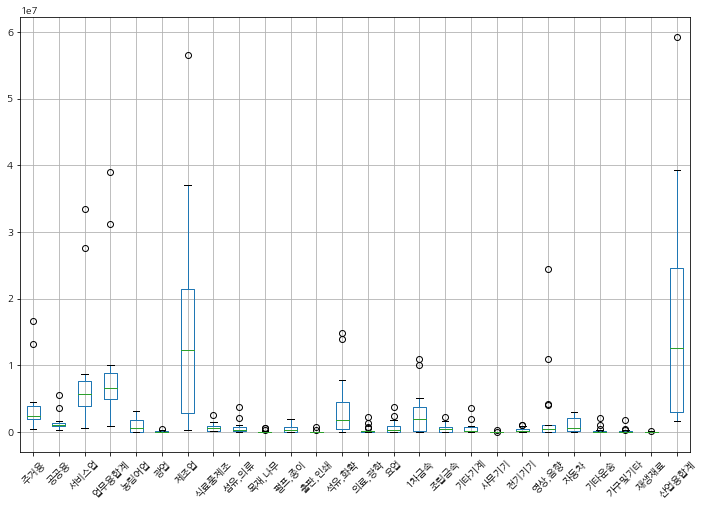

In [51]:
power.drop('합계', axis=1).boxplot(figsize=(12,8))
plt.xticks(rotation=45)

<AxesSubplot:>

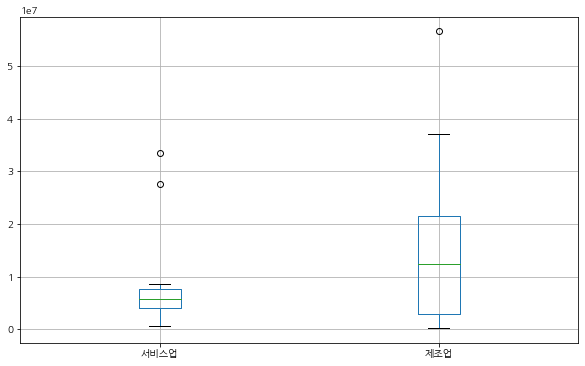

In [52]:
power[['서비스업','제조업']].boxplot(figsize=(10,6))

바 플롯 (수평형)
--

In [53]:
power = power.drop('합계', axis=1)

<AxesSubplot:ylabel='구분'>

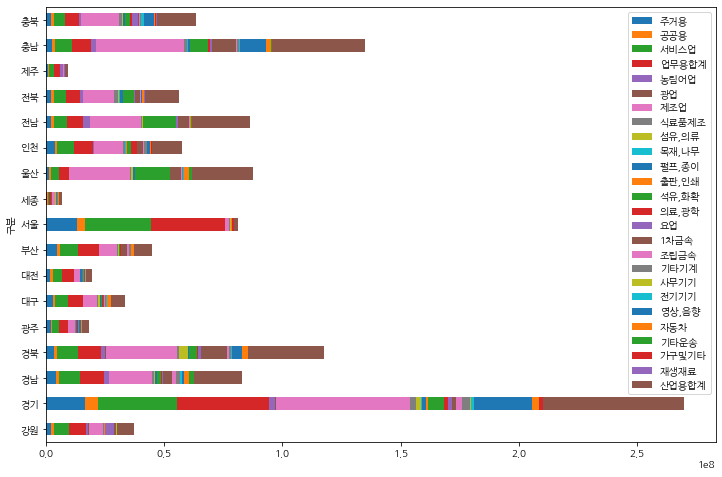

In [54]:
power.plot(kind='barh', figsize=(12,8), stacked=True)

<AxesSubplot:ylabel='구분'>

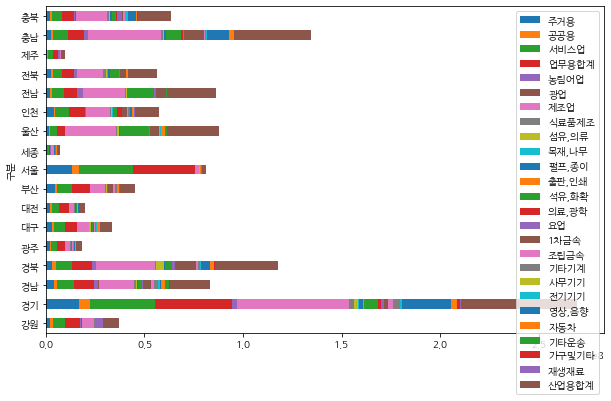

In [55]:
power.plot(kind='barh', figsize=(10,6), stacked=True)

<AxesSubplot:ylabel='구분'>

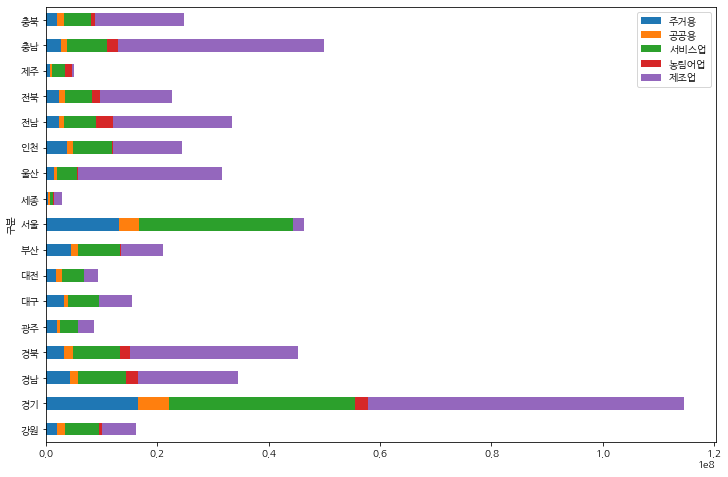

In [56]:
sample = ['주거용', '공공용', '서비스업', '농림어업', '제조업']
power[sample].plot(kind='barh', figsize=(12,8), stacked=True)

<AxesSubplot:ylabel='구분'>

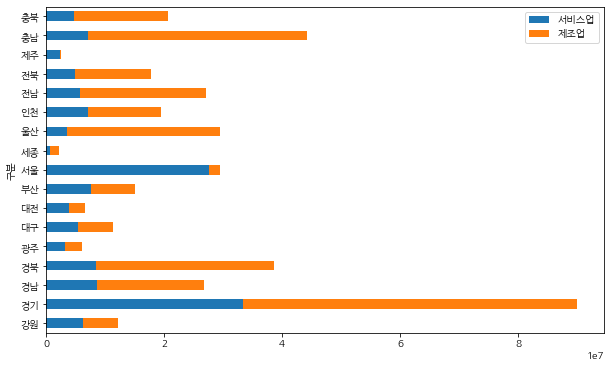

In [57]:
see2 = [ '서비스업','제조업']
power[see2].plot(kind='barh', figsize=(10,6), stacked=True)

In [58]:
power = power[['서비스업', '제조업']]
power.head(5)

,서비스업,제조업
구분,,
강원,6203749,6002286
경기,33434551,56603327
경남,8667737,18053778
경북,8487402,30115601
광주,3174973,2910768


히스토그램
--

<AxesSubplot:>

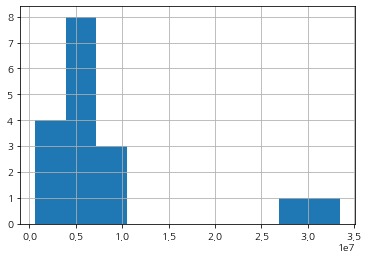

In [59]:
power['서비스업'].hist()

스캐터 플롯
--

In [60]:
print(power.shape)

(17, 2)


In [61]:
n_samples = power.shape[0]
n_samples

17

In [62]:
print(n_samples)

17


Text(0, 0.5, '제조업')

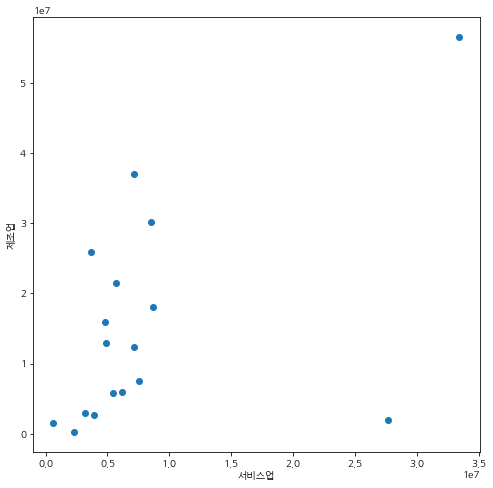

In [63]:
plt.figure(figsize=(8,8))
plt.scatter(power['서비스업'], power['제조업'])
plt.xlabel('서비스업')
plt.ylabel('제조업')

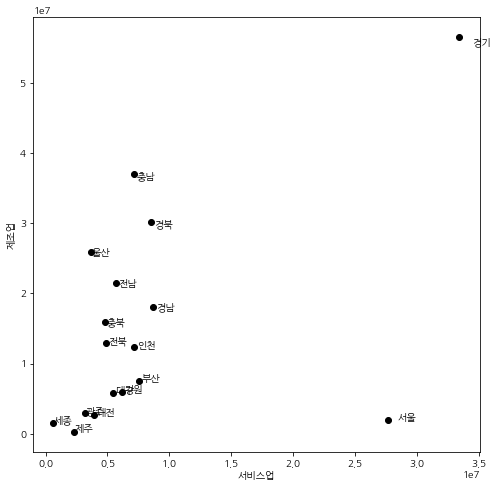

In [64]:
plt.figure(figsize=(8,8))
plt.scatter(power['서비스업'], power['제조업'],c='k',marker='o')
plt.xlabel('서비스업')
plt.ylabel('제조업')

for n in range(power.shape[0]):
    plt.text(power['서비스업'][n]*1.03, power['제조업'][n]*0.98, power.index[n])

In [65]:
power = power.drop(['경기', '서울'])

In [66]:
power

,서비스업,제조업
구분,,
강원,6203749,6002286
경남,8667737,18053778
경북,8487402,30115601
광주,3174973,2910768
대구,5470438,5862633
대전,3955921,2608343
부산,7582169,7512588
세종,645424,1502922
울산,3649386,25883132


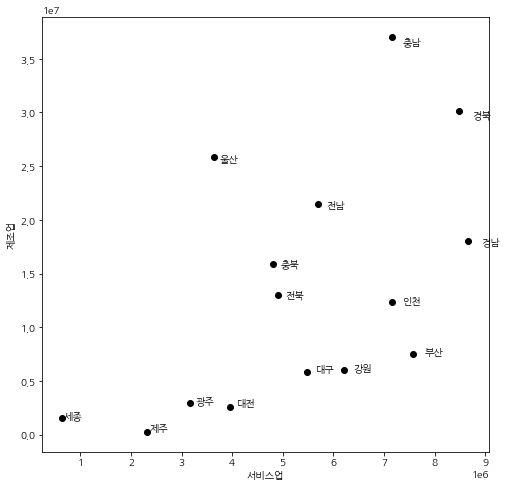

In [67]:
plt.figure(figsize=(8,8))
plt.scatter(power['서비스업'], power['제조업'],c='k',marker='o')
plt.xlabel('서비스업')
plt.ylabel('제조업')

for n in range(power.shape[0]):
    plt.text(power['서비스업'][n]*1.03, power['제조업'][n]*0.98, power.index[n])